In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
dir = r"C:\Users\krishi\Desktop\dataset\color\Useful"

# Define label mappings
all_labels = ['Bacterial Blight', 'Cotton Curl Virus', 'Fusarium Wilt']
binary_labels = [0, 1, 2]

In [21]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [22]:
root_dir = listdir(dir)
image_list, label_list = [], []

# Reading and converting images to numpy arrays
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp = all_labels.index(directory)
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

# Convert lists to numpy arrays and normalize
image_list = np.array(image_list, dtype=np.float16) / 255.0
label_list = np.array(label_list)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Further split training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense_5 (Dense)             (None, 8)                 2

8/8 [==============================] - 20s 2s/step - loss: 0.2517 - accuracy: 0.9334 - val_loss: 0.2673 - val_accuracy: 0.9016
Epoch 50/70
8/8 [==============================] - 19s 2s/step - loss: 0.2477 - accuracy: 0.9180 - val_loss: 0.2590 - val_accuracy: 0.9098
Epoch 51/70
8/8 [==============================] - 19s 2s/step - loss: 0.2479 - accuracy: 0.9242 - val_loss: 0.2638 - val_accuracy: 0.9262
Epoch 52/70
8/8 [==============================] - 19s 2s/step - loss: 0.2478 - accuracy: 0.9232 - val_loss: 0.2792 - val_accuracy: 0.9139
Epoch 53/70
8/8 [==============================] - 19s 2s/step - loss: 0.2512 - accuracy: 0.9150 - val_loss: 0.2566 - val_accuracy: 0.9303
Epoch 54/70
8/8 [==============================] - 20s 2s/step - loss: 0.2459 - accuracy: 0.9324 - val_loss: 0.2614 - val_accuracy: 0.9344
Epoch 55/70
8/8 [==============================] - 19s 2s/step - loss: 0.2451 - accuracy: 0.9344 - val_loss: 0.2705 - val_accuracy: 0.9016
Epoch 56/70
8/8 [======================

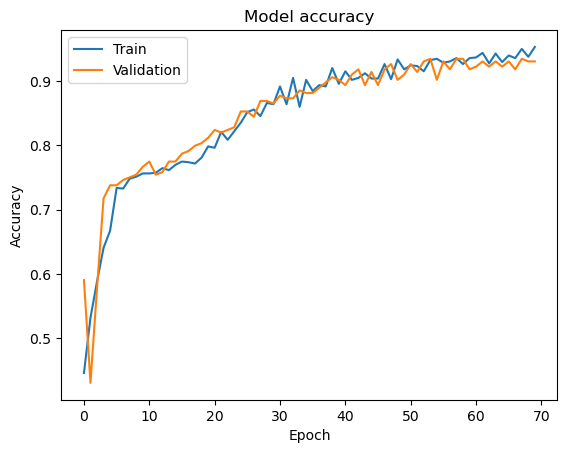

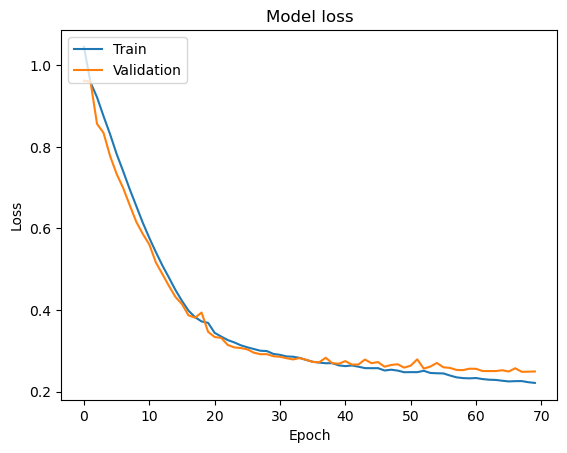

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
# Load structured data
structured_data_path = r"C:\Users\krishi\Desktop\dataset\plant_disease_multimodal_dataset.csv"
structured_data = pd.read_csv(structured_data_path)

# Encode target labels
label_mapping = {
    "Bacterial Blight": 2,
    "Cotton Curl Virus": 1,
    "Fusarium Wilt": 0
}
structured_data['Mapped Label'] = structured_data['Mapped Label'].map(label_mapping)

# Split features and target
X_structured = structured_data.drop('Mapped Label', axis=1).values
y_structured = structured_data['Mapped Label'].values

# Split the data into training and testing sets
X_train_structured, X_test_structured, y_train_structured, y_test_structured = train_test_split(X_structured, y_structured, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_structured = to_categorical(y_train_structured)
y_test_structured = to_categorical(y_test_structured)


In [27]:
structured_model = Sequential()
structured_model.add(Dense(64, input_dim=X_train_structured.shape[1], activation='relu'))
structured_model.add(Dense(32, activation='relu'))
structured_model.add(Flatten())  # Flatten to integrate with image model


In [28]:
from tensorflow.keras.layers import Concatenate, Input
from tensorflow.keras.models import Model

# Define inputs
image_input = Input(shape=(256, 256, 3))
structured_input = Input(shape=(X_train_structured.shape[1],))

# Get outputs from pre-trained models
image_output = model(image_input)
structured_output = structured_model(structured_input)

# Concatenate outputs
combined = Concatenate()([image_output, structured_output])

# Add final dense layers
x = Dense(1024, activation='relu')(combined)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
combined_output = Dense(3, activation='softmax')(x)

# Define the combined model
combined_model = Model(inputs=[image_input, structured_input], outputs=combined_output)

# Compile the combined model
combined_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the combined model
combined_history = combined_model.fit([x_train, X_train_structured], y_train_structured, 
                                      validation_data=([x_val, X_test_structured], y_val), 
                                      epochs=epochs, batch_size=batch_size)


ValueError: Data cardinality is ambiguous:
  x sizes: 976, 24000
  y sizes: 24000
Make sure all arrays contain the same number of samples.